In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tqdm

data_path = "./data/"

In [2]:
image = cv.imread(data_path + "sad.jpg")

### Original image

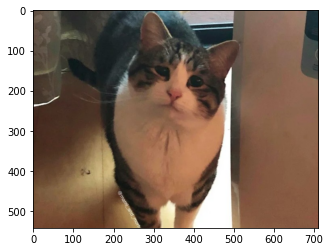

In [3]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

### Convolution

In [4]:
filters = np.random.uniform(size=(5, 3, 3, 3))
images = np.zeros((5, image.shape[0], image.shape[1]), dtype=np.float32)

with tqdm.tqdm(total=5 * image.shape[0]) as pbar:
    for filter in range(5):
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                for i in range(3):
                    for j in range(3):
                        for k in range(3):
                            xx = min(x + i, 2)
                            yy = min(y + j, 2)
                            images[filter][x][y] += image[k, xx, yy] * filters[filter, k, i, j]
            pbar.update(1)

100%|██████████| 2710/2710 [05:23<00:00,  8.37it/s]


### Normalization

In [5]:
for i in range(5):
    mean = images[i].mean(axis=0)
    var = ((images[i] - mean)**2).mean(axis=0)
    images[i] = (images[i] - mean) / np.sqrt(var + 1e-9)

### ReLU

In [6]:
with tqdm.tqdm(total=5 * image.shape[0]) as pbar:
    for i in range(5):
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                images[i, x, y] = np.maximum(0, images[i, x, y])
            pbar.update(1)

100%|██████████| 2710/2710 [00:04<00:00, 576.15it/s]


### Max pooling

In [7]:
pool_size = 2
new_width = image.shape[0] // pool_size
new_height = image.shape[1] // pool_size

image_maximums = np.empty((5, new_width, new_height), dtype=np.float32)

with tqdm.tqdm(total=5 * new_width) as pbar:
    for i in range(5):
        for x in range(new_width):
            for y in range(new_height):
                mx = -1
                for cur_x in range(x * pool_size, (x + 1) * pool_size):
                    for cur_y in range(y * pool_size, (y + 1) * pool_size):
                        mx = np.maximum(mx, images[i, cur_x, cur_y])
                image_maximums[i, x, y] = mx
            pbar.update(1)

100%|██████████| 1355/1355 [00:05<00:00, 264.49it/s]


### Softmax

In [8]:
final = np.empty((5, new_width, new_height), dtype=np.float32)
for i in range(5):
    final[i] = np.exp(image_maximums[i]) / sum(np.exp(image_maximums))

In [9]:
final[0]

array([[0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012],
       [0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012],
       [0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012],
       ...,
       [0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012],
       [0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012],
       [0.14884983, 0.32220012, 0.32220012, ..., 0.32220012, 0.32220012,
        0.32220012]], dtype=float32)